## ¿Qué es una red neuronal?

Las redes neuronales son un tipo de modelo de Machine Learning.

Los modelos de redes neuronales (Artificial Neural Networks) se inspiran en la forma en que una red neuronal biológica responde a los estímulos. Estos modelos utilizan una red de nodos, que funcionan de manera conjunta para entregar una respuesta.

Este tipo de modelo puede ser aplicado a variadas tareas de aprendizaje.

Algunas características generales:

1. Son robustas y tolerantes a fallas, comparados con otros tipos de modelos.
   
2. Manejan bien información difusa y con ruido.
   
3. Permiten facilmente el procesamiento en paralelo.
   
4. Por otro lado, no son un modelo de caja blanca. No son modelos explicativos. 
   
5. Son modelos no lineales. Son muy precisas.
   
6. Sólo aceptan inputs numéricos.

## El nodo como unidad fundamental

La unidad básica de una red neuronal es el **nodo**. Se suele denominar también **unidad o neurona**.

Los nodos generan un proceso mediante el cual, a partir de señales de entrada, generan una señal de salida. Las señales de entradas son los valores que corresponden a atributos $(X_1,X_2,...,X_k)$ (vector de k números reales, uno correspondiente al valor de cada uno de los k atributos). Cada uno de estos atributos es ponderado mediante un vector de parámetros $(w_1,w_2,...,w_k)$ (vector de números reales), de acuerdo a su importancia relativa. La sumatoria de las señales de entrada (estímulo) ponderadas (o lo que es lo mismo, el resultado de producto interno $w\cdot x)$ es evaluada por una **función de activación $f$**, que genera una señal de salida $y$.

O sea tenemos:

1. Señales de entrada (vector de k nros reales).

2. Parámetros o pesos.

3. Estímulo o señal neta.

4. Función de activación.

5. Respuesta.

La siguiente figura ofrece un esquema de esta estructura.

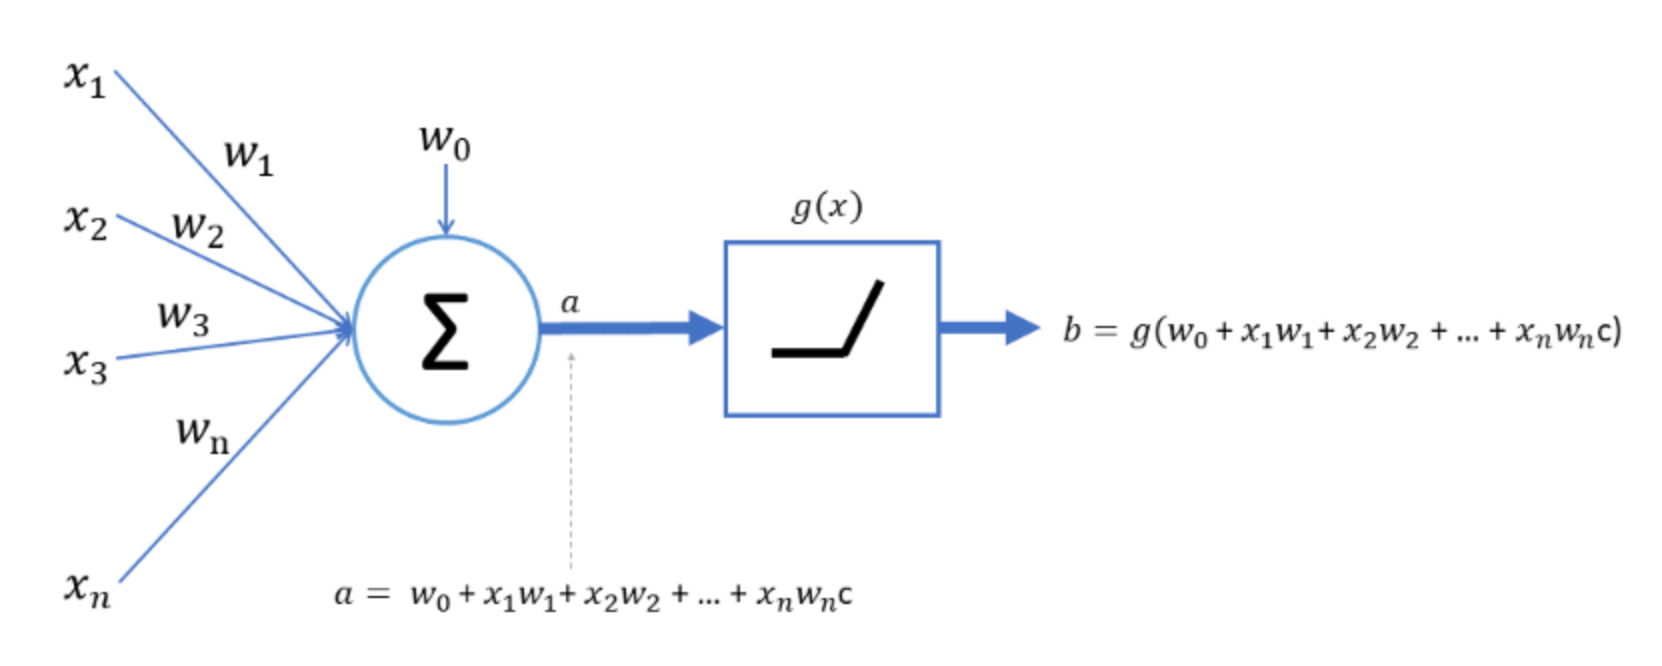

En el proceso de entrenamiento, se añade a lo anterior un proceso para ir ajustando los pesos.

El proceso de entrenamiento de la red se realiza por ejemplo individual.

Para cada ejemplo, se realiza el calculo de una respuesta, y se compara con el gt correspondiente. Se añade un mecanismo de ajuste de los pesos para modificar los pesos en función de los resultados. 

* Mecanismo de ajuste de los pesos.

## Estructura de una red neuronal

La estructura de un modelo de redes neuronales se define a partir de un conjunto de características como son:

1. Cuál es la función de activación $f$.

2. Topología o arquitectura de la red, que define el número de neuronas, el número de capas, la interrelación entre los elementos.

3. El algoritmo de entrenamiento, que determina la manera en que serán calibrados los parámetros $w_i$.

## Ejemplo

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3  
from matplotlib import gridspec
import math
import zutils001

In [7]:
# --- Carga de datos --- #
X = np.array([[0, 1], [1,0],[0,0],[1,1]])
T = np.array([0, 0, 0, 1])

print(X, "\n\n", T)

[[0 1]
 [1 0]
 [0 0]
 [1 1]] 

 [0 0 0 1]


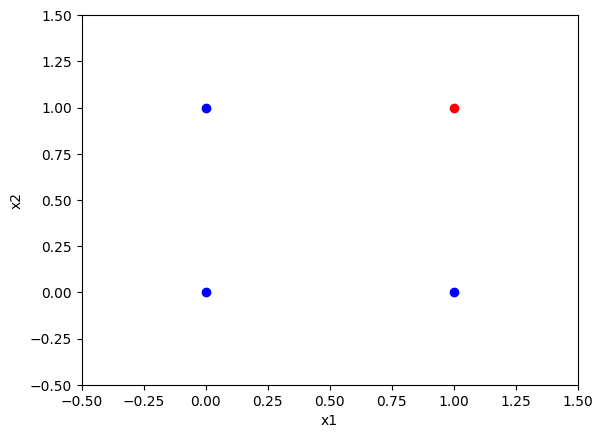

In [8]:
zutils001.dibuPtos(X, T, borde=0.5)

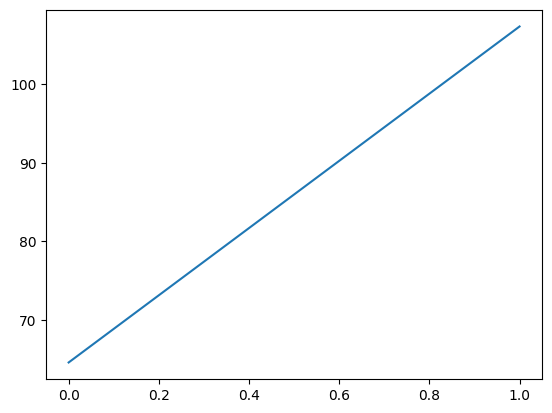

In [9]:
# --- Pesos iniciales --- #
W = np.array(np.random.uniform(-0.5, 0.5, size=2)) # los pesos son aleatorios.
b = np.random.uniform(-0.5, 0.5)

ph = zutils001.dibuRecta(X, W, b)

In [12]:
# --- Hiperparámetros: iteraciones máximas, tasa de aprendizaje --- #
MAX_ITE = 10
alfa = 0.2

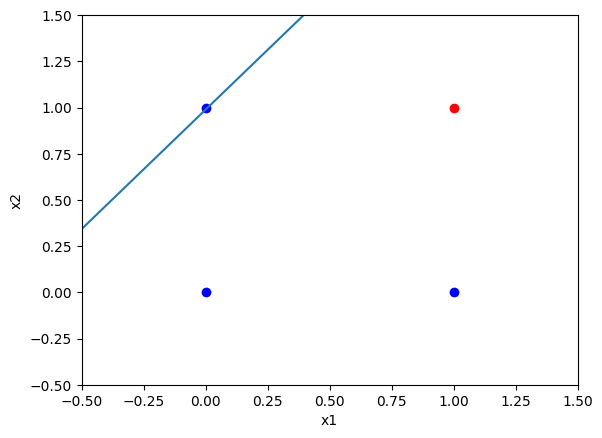

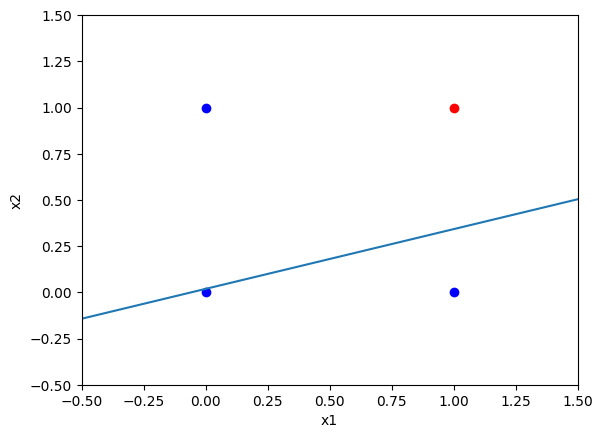

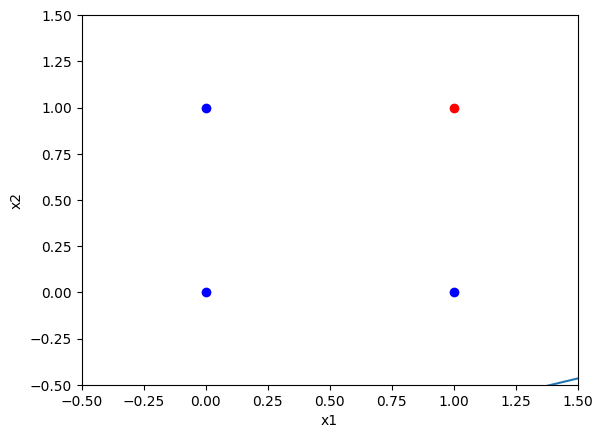

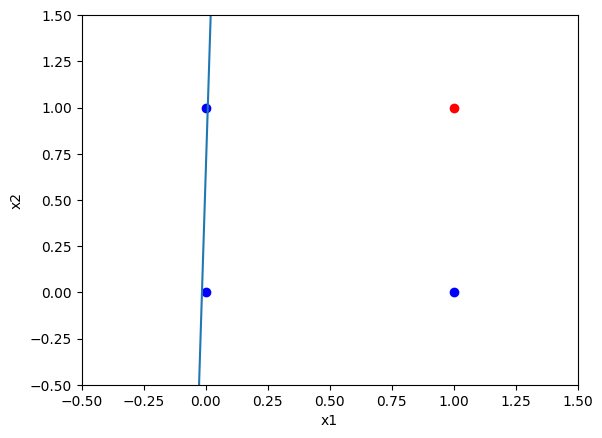

ite 1


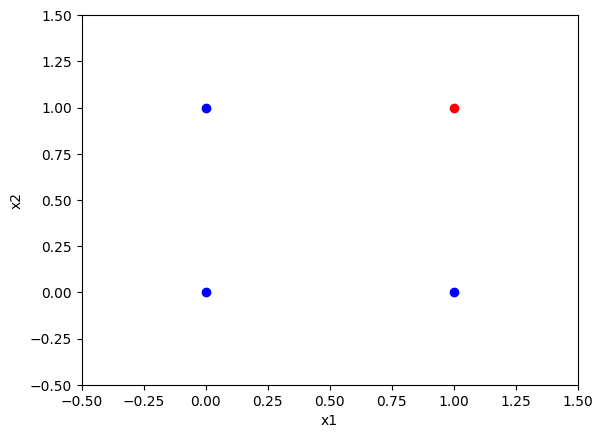

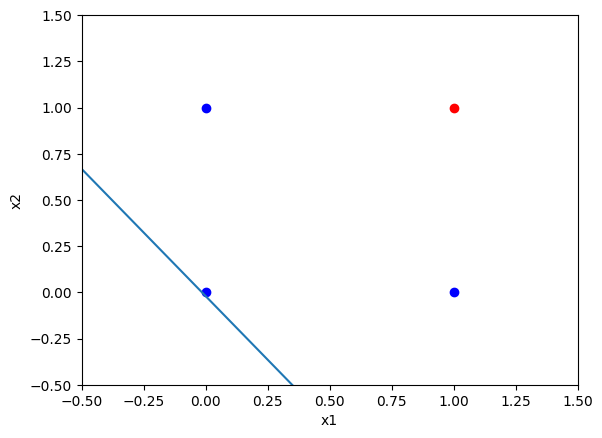

ite 2


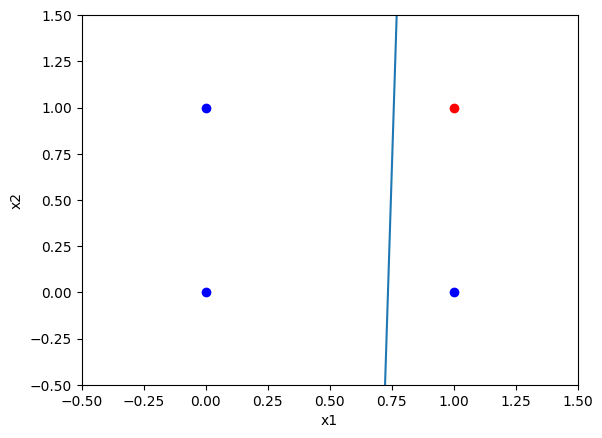

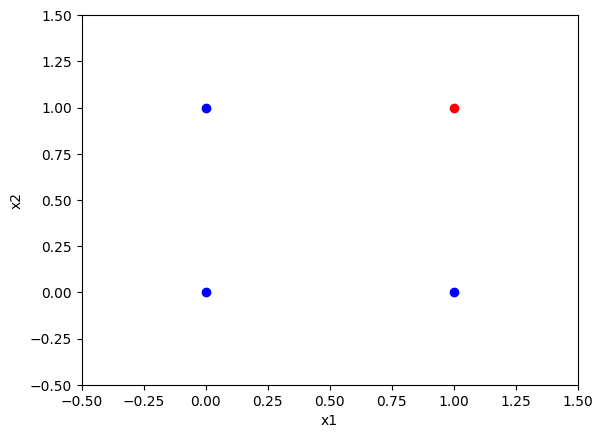

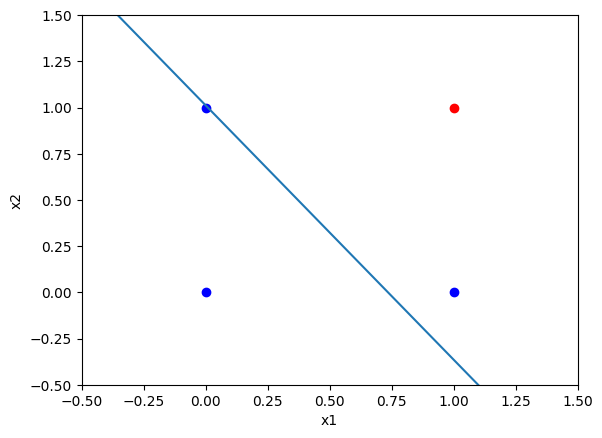

ite 3


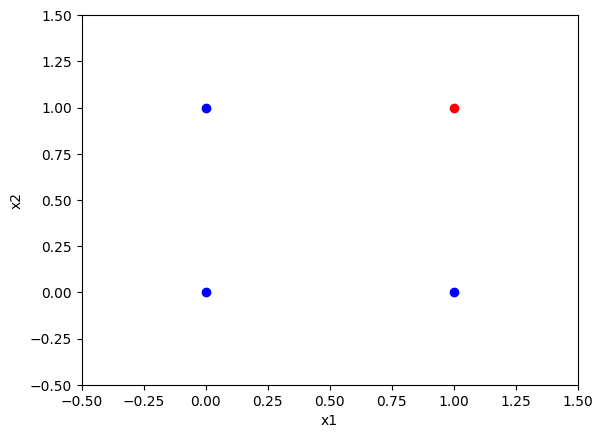

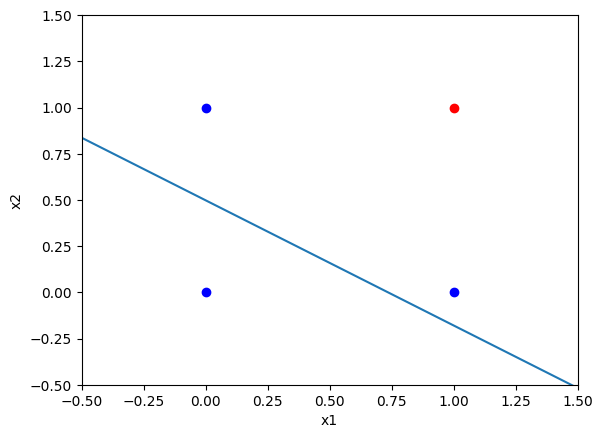

ite 4


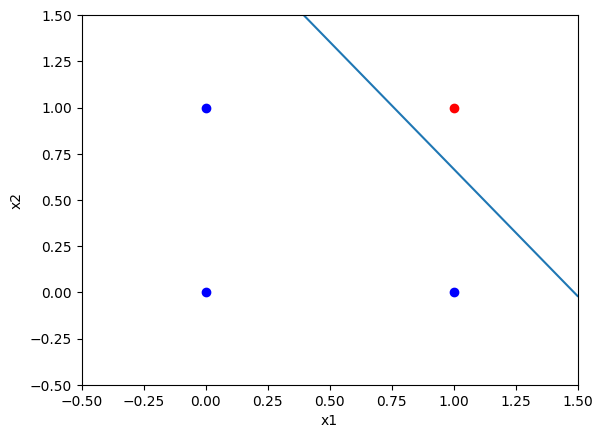

ite 5
ite 6
ite 7
ite 8
ite 9
ite 10


In [13]:
# --- Auxiliar: tamaño de los datos de entrada y titulos --- #
nEj = X.shape[0]   #nro. de filas
nAtrib = X.shape[1] #nro. de columnas
titulos = ['X1', 'X2'] 

#--- Proceso --- # 
ite=0
while (ite<MAX_ITE):
    for e in range(nEj):
      # 1. a partir de señales (vector) y con los pesos 
      # aleatorios (vector), se calcula la señal neta - estímulo (real).

      y = W[0] * X[e,0] + W[1] * X[e,1] + b 

      # 2. La señal neta pasa por la función de activación, generando la respuesta.
      # En este caso, la función de activación es la función escalón.
      # o sea, binariza la señal neta.
      
      if y >= 0:
        y = 1
      else:
        y = 0

      # 3. EVALUACIÓN: dada i. RESPUESTA ii. FORMULA DE ACTUALIZACIÓN, iii. TASA DE APRENDIZAJE, iv. CONDICIONES DE PARADA -> NUEVOS PESOS
      # 3. Esta respuesta es comparada con la deseada.
      # Se produce un error, que se utiliza para actualizar los pesos.
      # La actualización se realiza de la forma: W = W + alfa * (T - y) * X
      # Fijarse que en este caso la actualización tiene la forma
      # W_nuevo = W_actual + (una proporción) * (una_dirección) * (vector de señales)
      # o sea, los nuevos pesos son: 
      # a. los mismos anteriores si no hay error.
      # b. si hay error, se ajustan todos en proporción a la señal de entrada.
      
      if T[e] != y:
        W[0] = W[0] + alfa * (T[e] - y) * X[e,0]
        W[1] = W[1] + alfa * (T[e] - y) * X[e,1]
        b = b + alfa * (T[e]-y)
        
        zutils001.dibuPtos(X, T, borde=0.5)
        ph = zutils001.dibuRecta(X, W, b, ph)
      
    ite = ite + 1
    print("ite %d" % ite)